In [129]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import joblib
from tensorflow.python.keras import activations

In [130]:
df=pd.read_csv('bankloan.csv')
df=df.dropna() # Drop the rows where at least one element is missing.
df.isna().any() # Checks if there is still any row with one element missing or more
df=df.drop('Loan_ID',axis=1) # drop column Loan_ID cuz we dont need it for prediction
df['LoanAmount']=(df['LoanAmount']*1000).astype(int) # transform amount in dollar
Counter(df['Loan_Status']) # check if our dataset is balanced (class 'Y' and class 'N' are so close) or not if not we use sampling methods like
# over-sampling or under-sampling we used here over-sampling method called smote

Counter({'N': 148, 'Y': 332})

In [131]:
pre_y=df.loc[: ,'Loan_Status']
pre_x=df.drop('Loan_Status',axis=1)
dm_x=pd.get_dummies(pre_x) # encode the features that are not numbers
dm_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,False,True,False,True,True,False,True,False,True,False,False
2,0.0,3000,0.0,66000,360.0,1.0,False,True,False,True,True,False,False,True,False,False,True
3,0.0,2583,2358.0,120000,360.0,1.0,False,True,False,True,False,True,True,False,False,False,True
4,0.0,6000,0.0,141000,360.0,1.0,False,True,True,False,True,False,True,False,False,False,True
5,2.0,5417,4196.0,267000,360.0,1.0,False,True,False,True,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,True,False,True,False,True,False,True,False,True,False,False
610,3.0,4106,0.0,40000,180.0,1.0,False,True,False,True,True,False,True,False,True,False,False
611,1.0,8072,240.0,253000,360.0,1.0,False,True,False,True,True,False,True,False,False,False,True
612,2.0,7583,0.0,187000,360.0,1.0,False,True,False,True,True,False,True,False,False,False,True


In [132]:
label_encoder = LabelEncoder()
dm_y = label_encoder.fit_transform(pre_y) # encode the label Y
dm_y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [133]:
smote = SMOTE(sampling_strategy='minority') #use smote technique to bump up our minority class
X1, y = smote.fit_resample(dm_x,dm_y) #apply smote on our dataset
sc = MinMaxScaler()
x= sc.fit_transform(X1) #scale our features values with minmaxscaler to avoid big range between values and cap them between 0 and 1 for more performance to our model
joblib.dump(sc, 'scaler.sav')
Counter(y) # check if our dataset is balanced now after applying smote

Counter({0: 332, 1: 332})

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

In [135]:
classifier = Sequential()
classifier.add(Dense(400, activation=activations.get('relu'), kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(200, activation=activations.get('relu'), kernel_initializer='random_normal'))
classifier.add(Dense(4, activation=activations.get('relu'), kernel_initializer='random_normal'))
classifier.add(Dense(1, activation=activations.get('sigmoid'), kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train,Y_train,batch_size=20,epochs=50,verbose=0)# epochs=50 means it will do forward and back propagation 50 times
eval_model=classifier.evaluate(X_train,Y_train)
eval_model # first value is loss , second value is accuracy

17/17 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8870


[0.2904943823814392, 0.887005627155304]

In [136]:
#classifier = Sequential(): This creates a new sequential model using the Keras API. The sequential model is a linear stack of layers.

#classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1])): This adds a fully connected layer (Dense layer) to the model with 200 units/neurons. The activation function used is ReLU (Rectified Linear Unit), and the weights of the layer are initialized using a random normal distribution. The input_dim parameter specifies the input dimension of the layer, which is inferred from the shape of X_test.

#classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal')): This adds another fully connected layer with 400 units/neurons to the model. The activation function is ReLU, and the weights are initialized randomly.

#classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal')): This adds another fully connected layer with 4 units/neurons and ReLU activation. The weights are initialized randomly.

#classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal')): This adds the final output layer with a single unit/neuron, representing the binary classification task. The activation function used is sigmoid, which is suitable for binary classification, and the weights are initialized randomly.

#classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']): This compiles the model. The 'adam' optimizer is used, which is an efficient optimization algorithm commonly used for training neural networks. The loss function is binary_crossentropy, appropriate for binary classification tasks. The metric to be evaluated during training and testing is accuracy.

#classifier.fit(X_train, Y_train, batch_size=20, epochs=50, verbose=0): This fits the model to the training data. It trains the model using the provided training data X_train and corresponding labels Y_train. The training is performed for 50 epochs (iterations over the entire dataset), with a batch size of 20. The verbose=0 parameter disables the progress updates during training.

In [137]:
y_pred=classifier.predict(X_test)
y_pred #this will predict the probability of being yes or no class using sigmoid function

5/5 [==============================] - 0s 2ms/step


array([[8.36247287e-04],
       [1.56884287e-02],
       [9.19801652e-01],
       [9.16525722e-01],
       [8.05932760e-01],
       [1.68098649e-03],
       [1.65023766e-02],
       [9.26271558e-01],
       [9.00309086e-01],
       [8.85502815e-01],
       [9.33021545e-01],
       [5.56358844e-02],
       [9.21039045e-01],
       [8.99712384e-01],
       [3.15642974e-04],
       [7.62121053e-04],
       [2.54313252e-03],
       [8.75126898e-01],
       [9.15682018e-01],
       [2.79952943e-01],
       [1.28149167e-01],
       [9.14520621e-01],
       [6.84086144e-01],
       [6.41385540e-02],
       [5.66675037e-04],
       [9.22498643e-01],
       [9.46646392e-01],
       [3.12026194e-03],
       [1.73383160e-03],
       [6.08847197e-03],
       [1.92123780e-03],
       [9.06656504e-01],
       [2.55306577e-03],
       [8.30259919e-01],
       [8.50297093e-01],
       [8.96372676e-01],
       [1.21829426e-03],
       [9.31139529e-01],
       [9.24581170e-01],
       [7.41765201e-01],


In [138]:
y_pred=(y_pred>0.53) # if the predicted probabilty is higher than 0.5 it will be in yes class if not it will in be in no class , 0.5 is a hyperparameter we can adjust using gready seach and cv
y_pred

array([[False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [

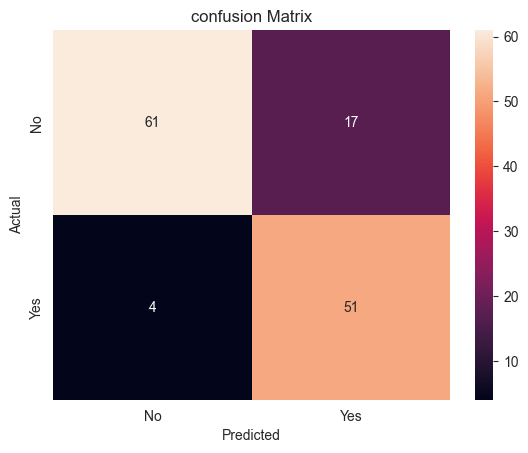

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('confusion Matrix')
ax.xaxis.set_ticklabels(['No','Yes']);ax.yaxis.set_ticklabels(['No','Yes']);

In [140]:
filename='loan_model'
classifier.save(filename)


INFO:tensorflow:Assets written to: loan_model\assets


INFO:tensorflow:Assets written to: loan_model\assets


In [141]:
# Combining X and Y into a new dataframe
names=dm_x.columns.tolist()

In [142]:
X_df = pd.DataFrame(X_test, columns=names)  # Specify column names for X
# Save combined DataFrame to Excel file
output_file = 'scaled_loan_data_test.xlsx'
X_df.to_excel(output_file, index=False)